# PROJEK AKHIR KECERDASAN BUATAN KELOMPOK 4

## Handbags Classification

## ANGGOTA KELOMPOK

1. Darniah 2009106116
2. Silvia Ananda 2009106120
3. Nurhidayah Anugrah 2009106121


## JOBS DESK 

- Nurhidayah Anugrah : Ketua Kelompok, Data Modeling dan Evaluasi 
- Darniah : Data Preprocessing dan Visualization
- Silvia Ananda : Data Analysis Dan Visualization

## HANDBAG CLASSIFICATION

Tas menjadi mode setelah akhir Perang Dunia II. Dan, dibuat dengan gaya yang lebih berani dan bentuk yang berbeda-beda, dan dibawa di bawah lengan untuk kepraktisan dan gaya. Branding pun menjadi semakin penting selama abad ke-20 dan desainer tas besar muncul. setelah melalui perkembangan yang begitu panjang kini tas semakin berkembang dan banyak beragama tas yang bermunculan mulai dari tas yang berjenis bakgpack, handbag, dan tote bag. Oleh karena itu tujuan dari program ini untuk melakukan classifikasi terhadap jenis tas yang ada.

## TENTANG DATASET

Dalam Dataset yang kami gunakan ini cuman ada 3 yaitu Backpack Min Bag, Shoulder Bag, dan Tote Bag dimana masing-masing kelas itu terbagai menjadi train dataset, test dataset dan validasi dataset. kami juga melakukan pembagian pada dataset secara manual karena memilih sekira nya yang akan menimbulkan akurasi yang tidak bagus atau nilai nya yang rendah. Dimana dataset kami memiliki Jumlah dataset sebanyak 2250 dataset ini terbagai keadalam 3 jenis yaitu train sebesar 1050, validasi 900, dan test 200 data.


## Import Library 

In [1]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns

## Data Preprocessing

### Membaca file dataset

In [2]:
train_path =r'dataset/Train Dataset'
val_path =r'dataset/Valid Dataset'
test_path =r'dataset/Test Dataset'

### Proses augmentasi dataset

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1/255, 
    horizontal_flip=True, 
    shear_range=0.2, 
    zoom_range=0.2,
    rotation_range=30,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    train_path,
    batch_size=64, 
    class_mode='categorical',
    target_size=(150,150))

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    batch_size=64, 
    class_mode='categorical',
    target_size=(150,150))

test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    batch_size=64, 
    class_mode='categorical',
    target_size=(150,150))

Found 1050 images belonging to 3 classes.
Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [4]:
image, label = train_generator.next()

In [5]:
labels = ['Backpack Min Bag','Shoulder Bag','Tote Bag']

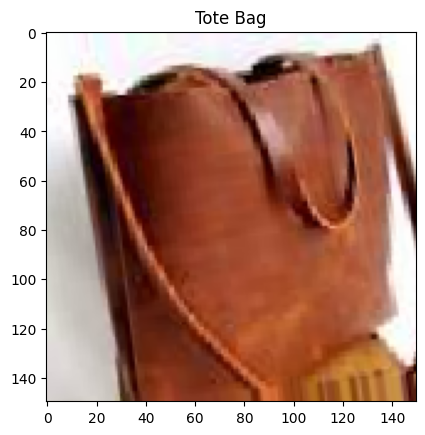

In [6]:
data = 3
plt.imshow(image[data])
plt.title(labels[tf.argmax(label[data])])
plt.show()

## Visualisasi dari dataset

In [7]:
for dirname, _, filenames in os.walk('../PA_KB_4/dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\1.jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\2.jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\3.jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\4.jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\5.jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\6.jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\Acer.jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\BM - Test (10).jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\BM - Test (10).jpg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\BM - Test (11).jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\BM - Test (11).jpg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\BM - Test (12).jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\BM - Test (12).jpg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\BM - Test (13).jpeg
../PA_KB_4/dataset/Test Dataset\Backpack Mini Bag\BM - Test (13).jpg
../PA_KB_4/dataset/Test Dataset\Backpack M

In [10]:
def load_imgs(impath):
    imgs=[]
    label=[]
    l1 = os.listdir(impath)
    print("list ",l1)
    
    for i in l1:
        print("=>",i)
        l2 = os.listdir(impath+'/'+i)
        count = 0
        for j in l2:
            
            if count == 1000:
                 break
            img = Image.open(impath+i+'/'+j)
            img = img.convert('RGB')
            img =img.resize(size=(28,28))
            img = np.array(img,dtype=np.float16)/255

            imgs.append(np.array(img))
            #print(img.shape)
            label.append(i)
            count = count+1
            del img
    #print(list1)
    
    return np.array(imgs),label
images,labels = load_imgs("../PA_KB_4/dataset/Train Dataset/")


print("tipe dari gambar----> ",type(images))
print("========================================================")
print("tipe dari label ----->",type(labels))


list  ['Backpack Min Bag', 'Shoulder Bag', 'Tote Bag']
=> Backpack Min Bag
=> Shoulder Bag
=> Tote Bag
tipe dari gambar---->  <class 'numpy.ndarray'>
tipe dari label -----> <class 'list'>


In [67]:
labels = pd.Series(labels,dtype='category')
labels

0       Backpack Min Bag
1       Backpack Min Bag
2       Backpack Min Bag
3       Backpack Min Bag
4       Backpack Min Bag
              ...       
1045            Tote Bag
1046            Tote Bag
1047            Tote Bag
1048            Tote Bag
1049            Tote Bag
Length: 1050, dtype: category
Categories (3, object): ['Backpack Min Bag', 'Shoulder Bag', 'Tote Bag']

In [68]:
labels.value_counts()

Backpack Min Bag    350
Shoulder Bag        350
Tote Bag            350
dtype: int64

In [69]:
d = dict(enumerate(labels.cat.categories))
print(d) 

{0: 'Backpack Min Bag', 1: 'Shoulder Bag', 2: 'Tote Bag'}


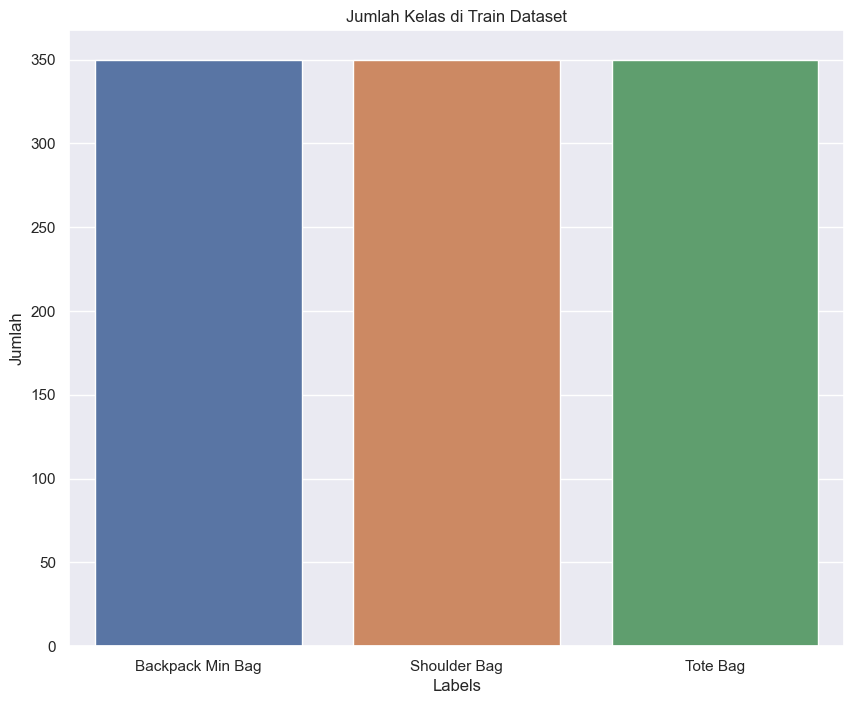

In [14]:
plt.figure(figsize=(10, 8))
sns.set_theme()

sns.countplot(x=labels)
plt.xlabel('Labels')
plt.ylabel('Jumlah')
plt.title('Jumlah Kelas di Train Dataset')
plt.show()

## Model dan Evaluasi

### Modelling

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])

In [16]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation = 'relu', input_dim = 784), 
#     tf.keras.layers.Dense(256, activation = 'relu'),
#     tf.keras.layers.Dense(124, activation = 'relu'),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [17]:
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
## callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 1e-4): #akan berhenti apabila memenuhi
            self.model.stop_training = True
            
cb = myCallback()

In [19]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data = val_generator, callbacks = cb
)

Epoch 1/50
17/17 [==============================] - 40s 2s/step - loss: 1.6263 - accuracy: 0.3305 - val_loss: 1.0871 - val_accuracy: 0.4378
Epoch 2/50
17/17 [==============================] - 36s 2s/step - loss: 1.0864 - accuracy: 0.4038 - val_loss: 1.0848 - val_accuracy: 0.3400
Epoch 3/50
17/17 [==============================] - 36s 2s/step - loss: 1.0673 - accuracy: 0.4286 - val_loss: 1.0302 - val_accuracy: 0.5111
Epoch 4/50
17/17 [==============================] - 36s 2s/step - loss: 1.0344 - accuracy: 0.4867 - val_loss: 0.9758 - val_accuracy: 0.5522
Epoch 5/50
17/17 [==============================] - 36s 2s/step - loss: 1.0129 - accuracy: 0.4857 - val_loss: 0.9483 - val_accuracy: 0.5556
Epoch 6/50
17/17 [==============================] - 36s 2s/step - loss: 0.9847 - accuracy: 0.5133 - val_loss: 0.9662 - val_accuracy: 0.5089
Epoch 7/50
17/17 [==============================] - 37s 2s/step - loss: 0.9408 - accuracy: 0.5286 - val_loss: 0.9229 - val_accuracy: 0.5600
Epoch 8/50
17/17 [==

### Visualisasi Hasil Akurasi dan Loss

In [20]:
#train
y_acctrain = history.history['accuracy']
y_accval = history.history['val_accuracy']

#validation
y_losstrain = history.history['loss']
y_lossval = history.history['val_loss']

#epoch
x_ = range(len(y_acctrain))

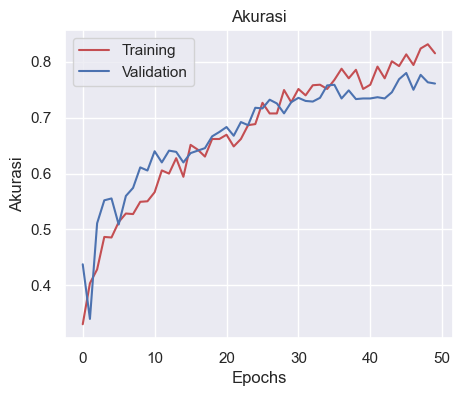

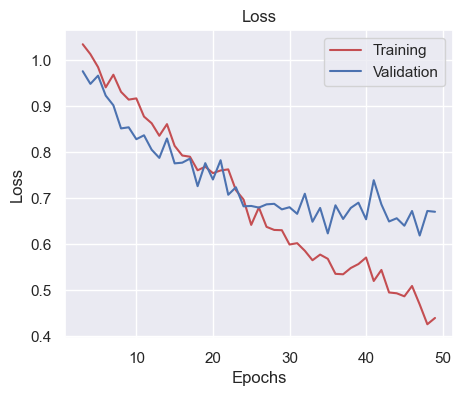

In [21]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acctrain, c='r', label='Training')
plt.plot(x_, y_accval, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_losstrain[3:], c='r', label='Training')
plt.plot(x_[3:], y_lossval[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluasi data val

In [22]:
model.evaluate(val_generator)

15/15 [==============================] - 7s 417ms/step - loss: 0.6706 - accuracy: 0.7611


[0.6705766320228577, 0.7611111402511597]

### Evaluasi model menggunakan data testing

In [25]:
test_evaluate = model.evaluate(test_generator)

print(f'Nilai Acccuracy : {round(test_evaluate[1],2)}')
print(f'Nilai Loss      : {test_evaluate[0]}')

5/5 [==============================] - 3s 551ms/step - loss: 0.2527 - accuracy: 0.9200
Nilai Acccuracy : 0.92
Nilai Loss      : 0.25274839997291565


### Model Prediction

In [27]:
print(f'Test accuracy : {round(test_evaluate[1],2)}')

Test accuracy : 0.92


### Predict data test

Pada tahap ini, akan menguji beberapa gambar dari folder "cobaa".

#### 1. Gambar 1 

1/1 [==============================] - 0s 49ms/step


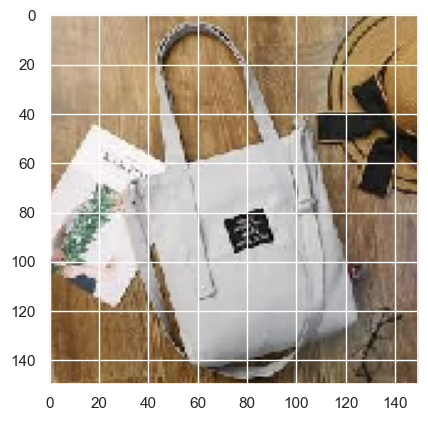

Backpack Mini Bag: 0.00%
Shoulder Bag: 0.00%
Tote Bag: 100.00%


In [102]:
from tensorflow.keras.preprocessing import image

labels = test_generator.class_indices.keys()

# predicting images
path = "cobaa/nyobaaa (1).jpeg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 

images = np.vstack([x])
proba = model.predict(images)[0]
plt.imshow(img)
plt.show()
for (label, p) in zip(labels, proba):
   print("{}: {:.2f}%".format(label, p * 100))

#### 2. Gambar 2

1/1 [==============================] - 0s 55ms/step


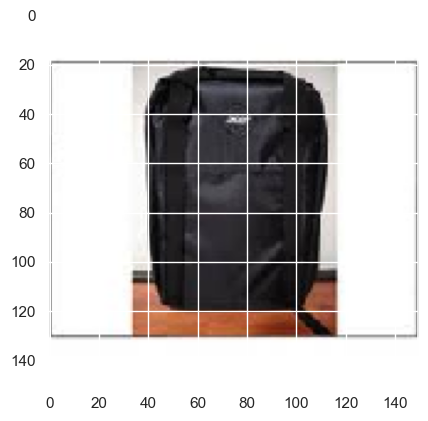

Backpack Mini Bag: 100.00%
Shoulder Bag: 0.00%
Tote Bag: 0.00%


In [103]:
path = "cobaa/nyobaaa (2).jpeg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 

images = np.vstack([x])
proba = model.predict(images)[0]
plt.imshow(img)
plt.show()
for (label, p) in zip(labels, proba):
   print("{}: {:.2f}%".format(label, p * 100))

#### 3. Gambar 3

1/1 [==============================] - 0s 58ms/step


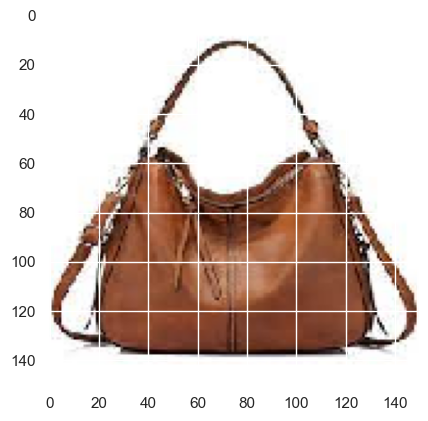

Backpack Mini Bag: 0.00%
Shoulder Bag: 100.00%
Tote Bag: 0.00%


In [105]:
path = "cobaa/nyobaaa (3).jpeg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 

images = np.vstack([x])
proba = model.predict(images)[0]
plt.imshow(img)
plt.show()
for (label, p) in zip(labels, proba):
   print("{}: {:.2f}%".format(label, p * 100))

### Model Saving

Menyimpan data model dengan tipe h5

In [106]:
model.save('model.h5')